# exercise 1 pandas repitition

0. Working with national test data

In [47]:
import pandas as pd 

national_test_file_path = "data/riket2023_åk9_np.xlsx"

# sheet names
sheet_names = pd.ExcelFile(national_test_file_path).sheet_names


# iterate through sheet names
# read each sheet into a dictionary of dataframes
df_dict = {}

for sheet_name in sheet_names[:-1]:
    df_dict[sheet_name] = pd.read_excel(
        national_test_file_path, skiprows=8, sheet_name=sheet_name
    )

df_dict.keys()



# pd.read_excel("data/riket2023_åk9_np.xlsx", skiprows=8)

dict_keys(['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk'])

In [48]:
df_dict["Matematik"]

,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [49]:
subjects = list(df_dict.keys())
subjects

['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']

# b) change name of columns

In [50]:
df_dict["Engelska"].columns

Index(['Riket', 'Typ av huvudman', 'Totalt', 'Flickor', 'Pojkar', 'Totalt ',
       'Flickor ', 'Pojkar ', 'Totalt  ', 'Flickor  ', 'Pojkar  '],
      dtype='object')

In [51]:
import numpy as np
postfixes = [""]*2 + [" (A-F)"]*3 + [" (A-E)"]*3 + [" (poäng)"]*3

np.array(postfixes)

array(['', '', ' (A-F)', ' (A-F)', ' (A-F)', ' (A-E)', ' (A-E)', ' (A-E)',
       ' (poäng)', ' (poäng)', ' (poäng)'], dtype='<U8')

In [52]:
df_dict["Engelska"].columns.str.strip() + np.array(postfixes) 

Index(['Riket', 'Typ av huvudman', 'Totalt (A-F)', 'Flickor (A-F)',
       'Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)',
       'Totalt (poäng)', 'Flickor (poäng)', 'Pojkar (poäng)'],
      dtype='object')

In [62]:
from copy import deepcopy

df_dict_cleaned  = deepcopy(df_dict)

for subject in subjects:
    new_columns = df_dict_cleaned[subject].columns.str.strip() + np.array(postfixes)
    df_dict_cleaned[subject].columns = new_columns
    df_dict_cleaned[subject] = df_dict_cleaned[subject].rename(
        {"Riket": "Plats", "Typ av huvudman": "Huvudman"}, axis=1
    )

df_dict_cleaned["Svenska"]

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,93225,45800,47425,96.1,97.9,94.4,13.6,14.5,12.7
1,Riket,Kommunal,72771,35484,37287,95.7,97.6,93.8,13.3,14.3,12.4
2,Riket,Enskild,20414,10297,10117,97.6,98.7,96.6,14.4,15.2,13.5
3,Riket,Skolverket,40,19,21,100.0,100.0,100.0,15.0,15.9,14.2


# c) EDA

In [63]:
df_dict_cleaned["Matematik"]

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [66]:
df_dict_cleaned["Matematik"].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Totalt (A-F),4.0,53383.000,50305.900509,50.0,16927.250,53358.00,89813.750,106766.0
Flickor (A-F),4.0,25774.000,24187.203159,25.0,8359.000,25761.50,43176.500,51548.0
Pojkar (A-F),4.0,27609.000,26119.924770,25.0,8568.250,27596.50,46637.250,55218.0
Totalt (poäng),4.0,12.650,1.138713,11.6,11.825,12.45,13.275,14.1
Flickor (poäng),4.0,12.400,0.920145,11.5,11.725,12.30,12.975,13.5
Pojkar (poäng),4.0,12.875,1.357387,11.7,11.925,12.55,13.500,14.7


In [67]:
df_dict_cleaned["Matematik"][["Huvudman", "Totalt (poäng)"]]

,Huvudman,Totalt (poäng)
0,Samtliga,11.9
1,Kommunal,11.6
2,Enskild,13.0
3,Skolverket,14.1


## d) amount of students that got F in math

In [68]:
df_math = df_dict_cleaned["Matematik"]
df_math

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [72]:
import duckdb

total_students = duckdb.query(
    """
    SELECT "Totalt (A-F)"
    FROM df_math
    WHERE huvudman = 'Samtliga'
"""
).df().values[0][0]

total_students

np.int64(106766)

In [74]:
students_passed = df_math.query("Huvudman == 'Samtliga'")["Totalt (A-E)"]*.01*total_students

students_passed

0    95128.506
Name: Totalt (A-E), dtype: object

In [75]:
students_failed = total_students - students_passed
students_failed[0]

11637.493999999992

# e) bar chart on total points for each subject

In [86]:
total_points = {}

df_dict_cleaned["Engelska"].query("Huvudman == 'Samtliga'")["Totalt (poäng)"][0]


np.float64(15.7)

In [84]:
for subject in subjects:
    total_points[subject] = df_dict_cleaned[subject].query("Huvudman == 'Samtliga'")[
        "Totalt (poäng)"
    ][0]

total_points

{'Engelska': np.float64(15.7),
 'Matematik': np.float64(11.9),
 'Svenska': np.float64(13.6),
 'Svenska som andraspråk': 9.4}

['Engelska', 'Matematik', 'Svenska', 'SvA']


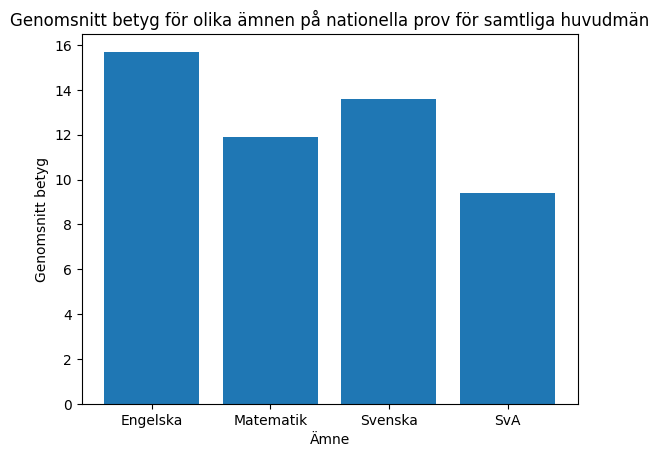

In [100]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)

ax.bar(x = total_points.keys(), height=total_points.values())
ax.set(
    xlabel='Ämne',
    ylabel='Genomsnitt betyg',
    title='Genomsnitt betyg för olika ämnen på nationella prov för samtliga huvudmän',
)

subjects[-1] = 'SvA'
print(subjects)
ax.set_xticks(labels=subjects, ticks=range(len(subjects)))

